## Introduction

Ce projet vise à analyser l'ensemble de données des feux de forêt en Algérie afin de mieux comprendre les facteurs qui contribuent aux incendies et de développer potentiellement des modèles pour prédire leur occurrence. L'analyse portera sur diverses variables météorologiques et indices de danger d'incendie pour identifier les tendances et les relations.

### Explication des Variables

Voici la description de chaque variable présente dans l'ensemble de données :

*   **day**: Le jour du mois.
*   **month**: Le mois.
*   **year**: L'année (qui est 2012 pour toutes les entrées dans cet ensemble de données).
*   **Temperature**: La température en degrés Celsius.
*   **RH**: L'humidité relative en pourcentage.
*   **Ws**: La vitesse du vent en km/h.
*   **Rain**: La quantité de pluie en mm.
*   **FFMC**: Le Fine Fuel Moisture Code (Indice d'humidité des combustibles fins). C'est une mesure de l'humidité des couches supérieures de litière et de la matière organique fine. Des valeurs plus élevées indiquent un risque d'incendie plus élevé.
*   **DMC**: Le Duff Moisture Code (Indice d'humidité de la couche de fermentation). C'est une mesure de l'humidité des couches organiques plus profondes. Des valeurs plus élevées indiquent un risque d'incendie plus élevé.
*   **DC**: Le Drought Code (Indice de sécheresse). C'est une mesure de la sécheresse du sol et des couches organiques profondes. Des valeurs plus élevées indiquent un risque d'incendie plus élevé.
*   **ISI**: L'Initial Spread Index (Indice de propagation initiale). C'est une mesure de la vitesse potentielle de propagation d'un incendie. Des valeurs plus élevées indiquent une propagation plus rapide.
*   **BUI**: Le Build-up Index (Indice d'accumulation). C'est une mesure de la quantité totale de combustible disponible pour un incendie. Des valeurs plus élevées indiquent plus de combustible.
*   **FWI**: Le Fire Weather Index (Indice de danger météorologique d'incendie). C'est un indice global du risque d'incendie qui combine les effets du FFMC, du DMC, du DC et de l'ISI. Des valeurs plus élevées indiquent un risque d'incendie plus élevé.
*   **Classes**: Indique si un incendie s'est produit ou non ("fire" ou "not fire").

Ces variables sont couramment utilisées dans les systèmes de prévision des incendies de forêt et fournissent des informations importantes sur les conditions météorologiques et les conditions des combustibles qui influencent le comportement des incendies.

In [226]:
import pandas as pd
df = pd.read_csv("/content/Algerian_forest_fires_dataset.csv")

In [227]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [228]:
df.columns = df.columns.str.strip().str.rstrip().str.title()

In [229]:
df.head(2)

,Day,Month,Year,Temperature,Rh,Ws,Rain,Ffmc,Dmc,Dc,Isi,Bui,Fwi,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire


In [230]:
vars_int = ["Day","Month","Year","Temperature","Rh","Ws"]
vars_float = ["Rain",'Ffmc','Dmc', 'Dc', 'Isi', 'Bui', 'Fwi']


In [231]:
df.shape

pd.options.display.max_rows = 15
df.loc[122:125,:]

,Day,Month,Year,Temperature,Rh,Ws,Rain,Ffmc,Dmc,Dc,Isi,Bui,Fwi,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [232]:
df_copy = df.copy()
df_copy.loc[125: ,"Region"] = "Sidi-Bel-Abbes"
df_copy.loc[0:121, "Region"] = "Bejaia"
df_copy.drop(index=[122,123,124],inplace=True)

In [233]:
df_copy.loc[df_copy['Region']==0,"Region"] = "Bejaia"

In [234]:
df_copy.isnull().sum()

,0
Day,0
Month,0
Year,0
Temperature,0
Rh,0
Ws,0
Rain,0
Ffmc,0
Dmc,0
Dc,0


In [235]:
df_copy['Classes'].mode()

,Classes
0,fire


In [236]:
df_copy.loc[df['Classes'].isnull() ,'Classes'] = 'fire' # replace with the mode
df_copy.isnull().sum()

,0
Day,0
Month,0
Year,0
Temperature,0
Rh,0
Ws,0
Rain,0
Ffmc,0
Dmc,0
Dc,0


In [237]:
# df_copy[vars_float]
import numpy as np

In [238]:
# df_copy.loc[df_copy['Dc'].str.contains(" " , case=False , na=False),'Dc'].replace("14.6 9","14.69")
df_copy.loc[df_copy['Dc'].str.contains(" " , case=False , na=False),'Dc']="14.69"


In [239]:
df_copy['Fwi']=df_copy['Fwi'].str.rstrip().replace("fire",np.nan).astype("float")
df_copy['Fwi'].fillna(df_copy['Fwi'].mean(),inplace=True)

/tmp/ipython-input-2626187164.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Fwi'].fillna(df_copy['Fwi'].mean(),inplace=True)


In [240]:
df_copy[vars_float]=df_copy[vars_float].astype("float")
df_copy[vars_int]=df_copy[vars_int].astype("int")


In [241]:
df_copy

,Day,Month,Year,Temperature,Rh,Ws,Rain,Ffmc,Dmc,Dc,Isi,Bui,Fwi,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel-Abbes
243,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,Sidi-Bel-Abbes
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel-Abbes
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel-Abbes


In [242]:
df_copy.duplicated().sum() ## No duplicate

np.int64(0)

In [243]:
df_copy['Classes'].mode()

,Classes
0,fire


In [244]:
df_copy['Classes'] = df_copy['Classes'].str.strip().str.replace('0', 'fire')
df_copy['Classes'] = df_copy['Classes'].str.title()

In [245]:
df_copy.to_csv("Algerian_forest_fires_dataset_cleaned.csv",index=False)

## EDA

In [246]:
data = df_copy.copy()

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          244 non-null    int64  
 1   Month        244 non-null    int64  
 2   Year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   Rh           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   Ffmc         244 non-null    float64
 8   Dmc          244 non-null    float64
 9   Dc           244 non-null    float64
 10  Isi          244 non-null    float64
 11  Bui          244 non-null    float64
 12  Fwi          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 30.5+ KB


In [248]:
cat = []
floats = []
ints = []
import numpy as np
for var in data.columns:
    dtype = data[var].dtypes

    if dtype == "O":
        cat.append(var)
    elif np.issubdtype(dtype, np.integer):
        ints.append(var)
    elif np.issubdtype(dtype, np.floating):
        floats.append(var)

print("📊 Variables catégorielles :", cat)
print("🔢 Variables numériques entières :", ints)
print("🔬 Variables numériques décimales :", floats)


📊 Variables catégorielles : ['Classes', 'Region']
🔢 Variables numériques entières : ['Day', 'Month', 'Year', 'Temperature', 'Rh', 'Ws']
🔬 Variables numériques décimales : ['Rain', 'Ffmc', 'Dmc', 'Dc', 'Isi', 'Bui', 'Fwi']


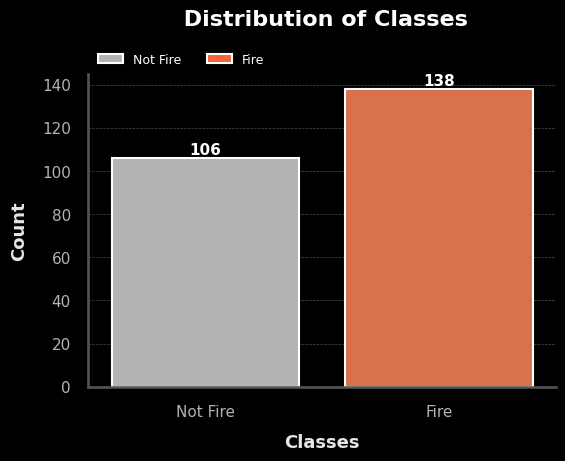

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Style général ---
plt.style.use("dark_background")
sns.set_context("talk")  # police un peu plus grande
# sns.set(font_scale=1.1)

# --- Palette personnalisée ---
palette = {
    "Not Fire": "#B3B3B5",  # gris clair neutre
    "Fire": "#F06437"       # orange chaud
}

# --- Figure et plot ---
g = sns.catplot(
    data=data,
    x="Classes",
    kind="count",
    hue="Classes",
    palette=palette,
    legend=False,            # on désactive la légende auto
    height=5,
    aspect=1.2
)
ax = g.axes[0, 0]

# --- Annotation sur chaque barre ---
for bar in ax.patches:
    h = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.text(
        x, h + 0.05,
        f"{int(h)}",           # affiche l’effectif absolu
        ha="center", va="bottom",
        fontsize=11, color="white", fontweight="bold"
    )

# --- Axes et titres ---
ax.set_xlabel("Classes", fontsize=13, color="#E6E6E6", fontweight="bold", labelpad=10)
ax.set_ylabel("Count", fontsize=13, color="#E6E6E6", fontweight="bold", labelpad=10)
ax.set_title(" Distribution of Classes", fontsize=16, color="white", pad=35, fontweight="bold")

# --- Personnalisation des axes ---
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#555555")
ax.spines["bottom"].set_color("#555555")

ax.tick_params(colors="#B3B3B5", labelsize=11)
ax.grid(axis="y", color="white", linestyle="--", linewidth=0.5,alpha=0.3)

# --- Légende custom intégrée (graphique sans doublon) ---
from matplotlib.patches import Patch
custom_leg = [
    Patch(facecolor="#B3B3B5", label="Not Fire"),
    Patch(facecolor="#F06437", label="Fire")
]
ax.legend(
    handles=custom_leg,
    title=" ",
    # title_fontsize=12,
    fontsize=9,
    frameon=False,
    # framealpha=0.8,
    bbox_to_anchor=(0.4, 1.2),
    ncols=2
)

plt.setp(ax.get_legend().get_texts(), color="white")
plt.setp(ax.get_legend().get_title(), color="#E6E6E6")

plt.tight_layout()
plt.show()


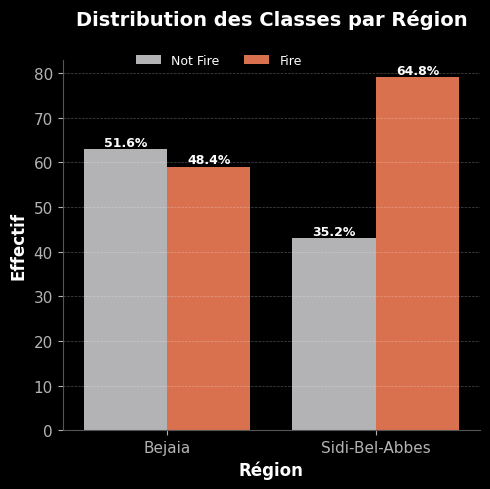

In [250]:

sns.reset_defaults()
plt.style.use("dark_background")
# 1) Plot (catplot renvoie un FacetGrid → récupérer l'axe)
g = sns.catplot(
    data=data,
    x="Region",
    kind="count",
    hue="Classes",
    palette=palette,
    legend=False
)
ax = g.axes[0, 0]  # axe unique

# 2) Totaux par Région (dénominateur des pourcentages)
totals = data["Region"].value_counts().to_dict()

# 3) Annotation des % sur CHAQUE barre
#    - On mappe la position x de la barre au tick le plus proche
#    - Puis on calcule % = hauteur / total_region
xticks = ax.get_xticks()
xlabels = [t.get_text() for t in ax.get_xticklabels()]

for bar in ax.patches:
    height = bar.get_height()
    if height == 0:
        continue

    # centre de la barre (en coords x)
    x_center = bar.get_x() + bar.get_width() / 2
    # index du tick le plus proche (catégorie)
    idx = int(np.argmin(np.abs(xticks - x_center)))
    region_name = xlabels[idx]

    total = totals.get(region_name, np.nan)
    if total and total > 0:
        pct = 100 * height / total
        ax.text(
            x_center, height + 0.05,
            f"{pct:.1f}%",
            ha="center", va="bottom",
            fontsize=9, color="white", fontweight="bold"
        )

# 4) Habillage
ax.set_xlabel("Région", fontsize=12, color="white", fontweight="bold")
ax.set_ylabel("Effectif", fontsize=12, color="white", fontweight="bold")
ax.set_title("Distribution des Classes par Région", fontsize=14, color="white", pad=25, fontweight="bold")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#555555")
ax.spines["bottom"].set_color("#555555")

ax.tick_params(colors="#B3B3B5", labelsize=11)
ax.grid(axis="y", color="white", linestyle="--", linewidth=0.5,alpha=0.3)
# Légende (éviter doublons avec catplot)
leg = ax.legend(title=" ",
                labels=["Not Fire",'Fire'],
                bbox_to_anchor=(0.6, 1.1),
                fontsize=9,
                frameon=False,
                ncols=2)


plt.setp(leg.get_texts(), color="white")
plt.setp(leg.get_title(), color="white", fontweight="bold")

plt.tight_layout()
plt.show()




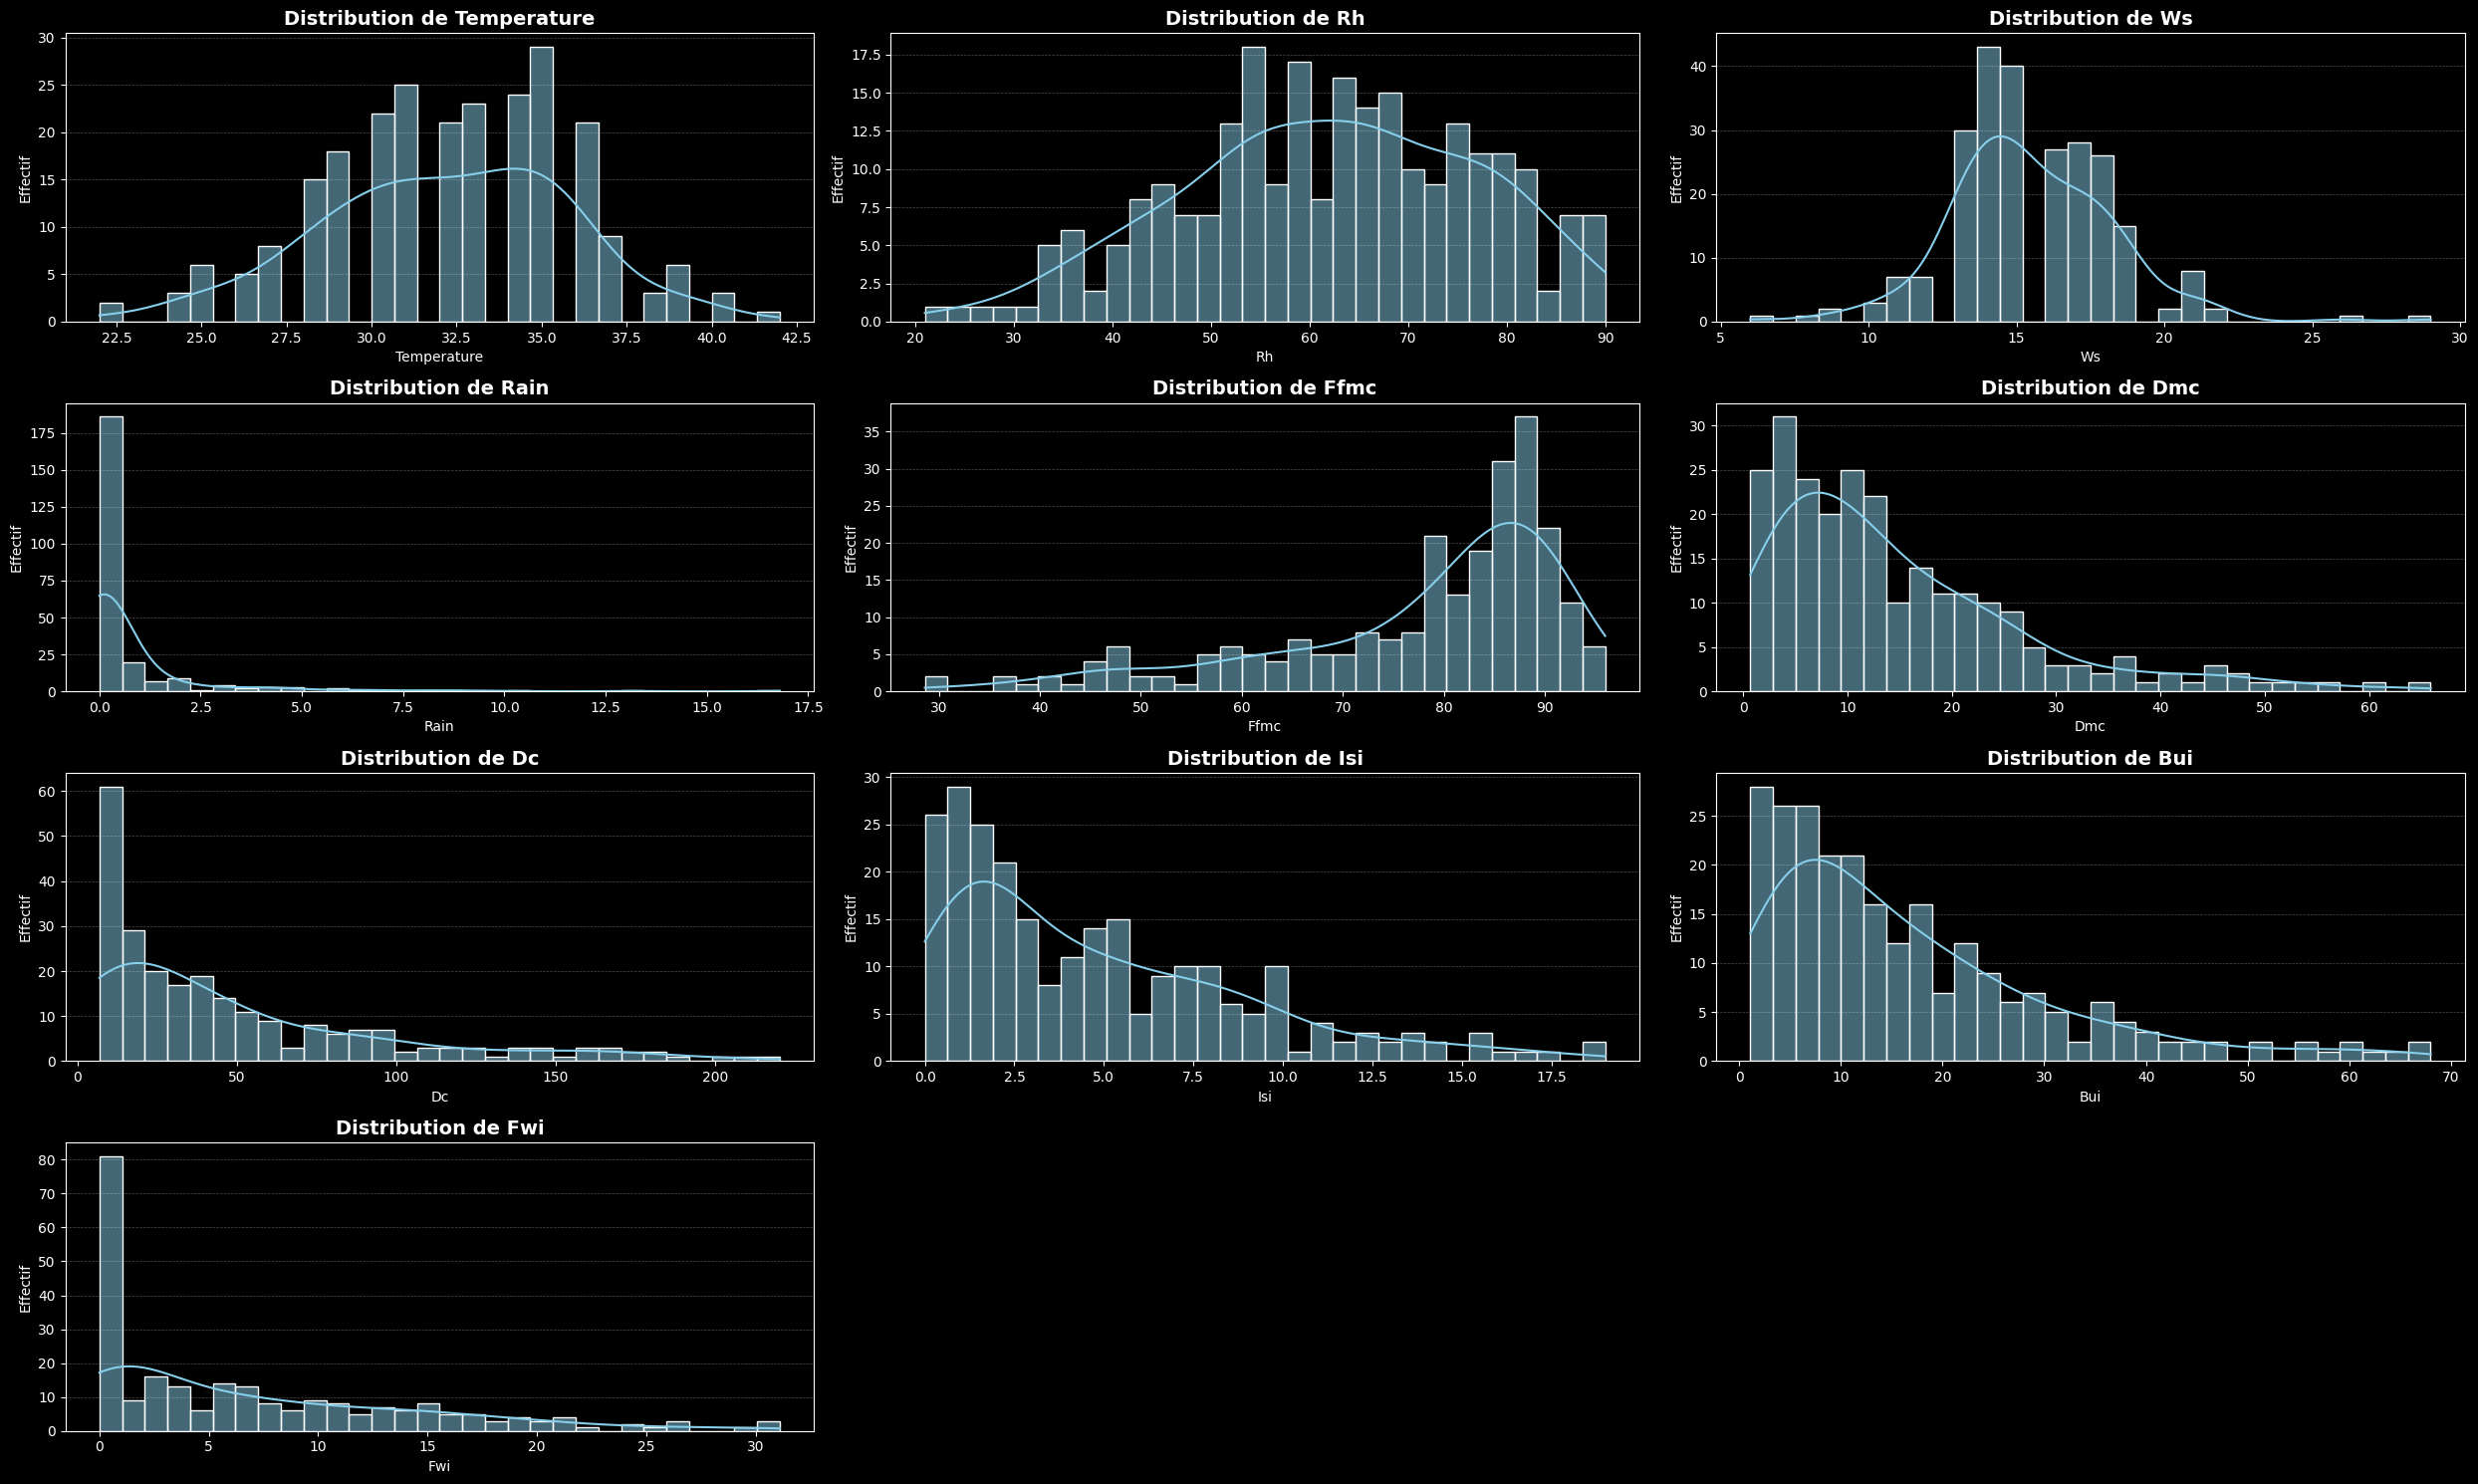

In [251]:
# data.columns
vars_num = ['Temperature', 'Rh', 'Ws', 'Rain', 'Ffmc',
       'Dmc', 'Dc', 'Isi', 'Bui', 'Fwi']



# On crée une grille de sous-graphiques
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(25, 15))
ax = ax.flatten()  # pour itérer facilement sur les axes

# Boucle sur les variables
for i, var in enumerate(vars_num):
    sns.histplot(data[var], bins=30, kde=True, ax=ax[i], color='skyblue')
    ax[i].set_title(f"Distribution de {var}", fontsize=14, fontweight='bold')
    ax[i].grid(axis='y', linestyle="--", linewidth=0.5, alpha=0.3)
    ax[i].set_xlabel(var)
    ax[i].set_ylabel("Effectif")

# Supprime les sous-graphiques vides si le nombre de variables < nb_axes
for j in range(len(vars_num), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


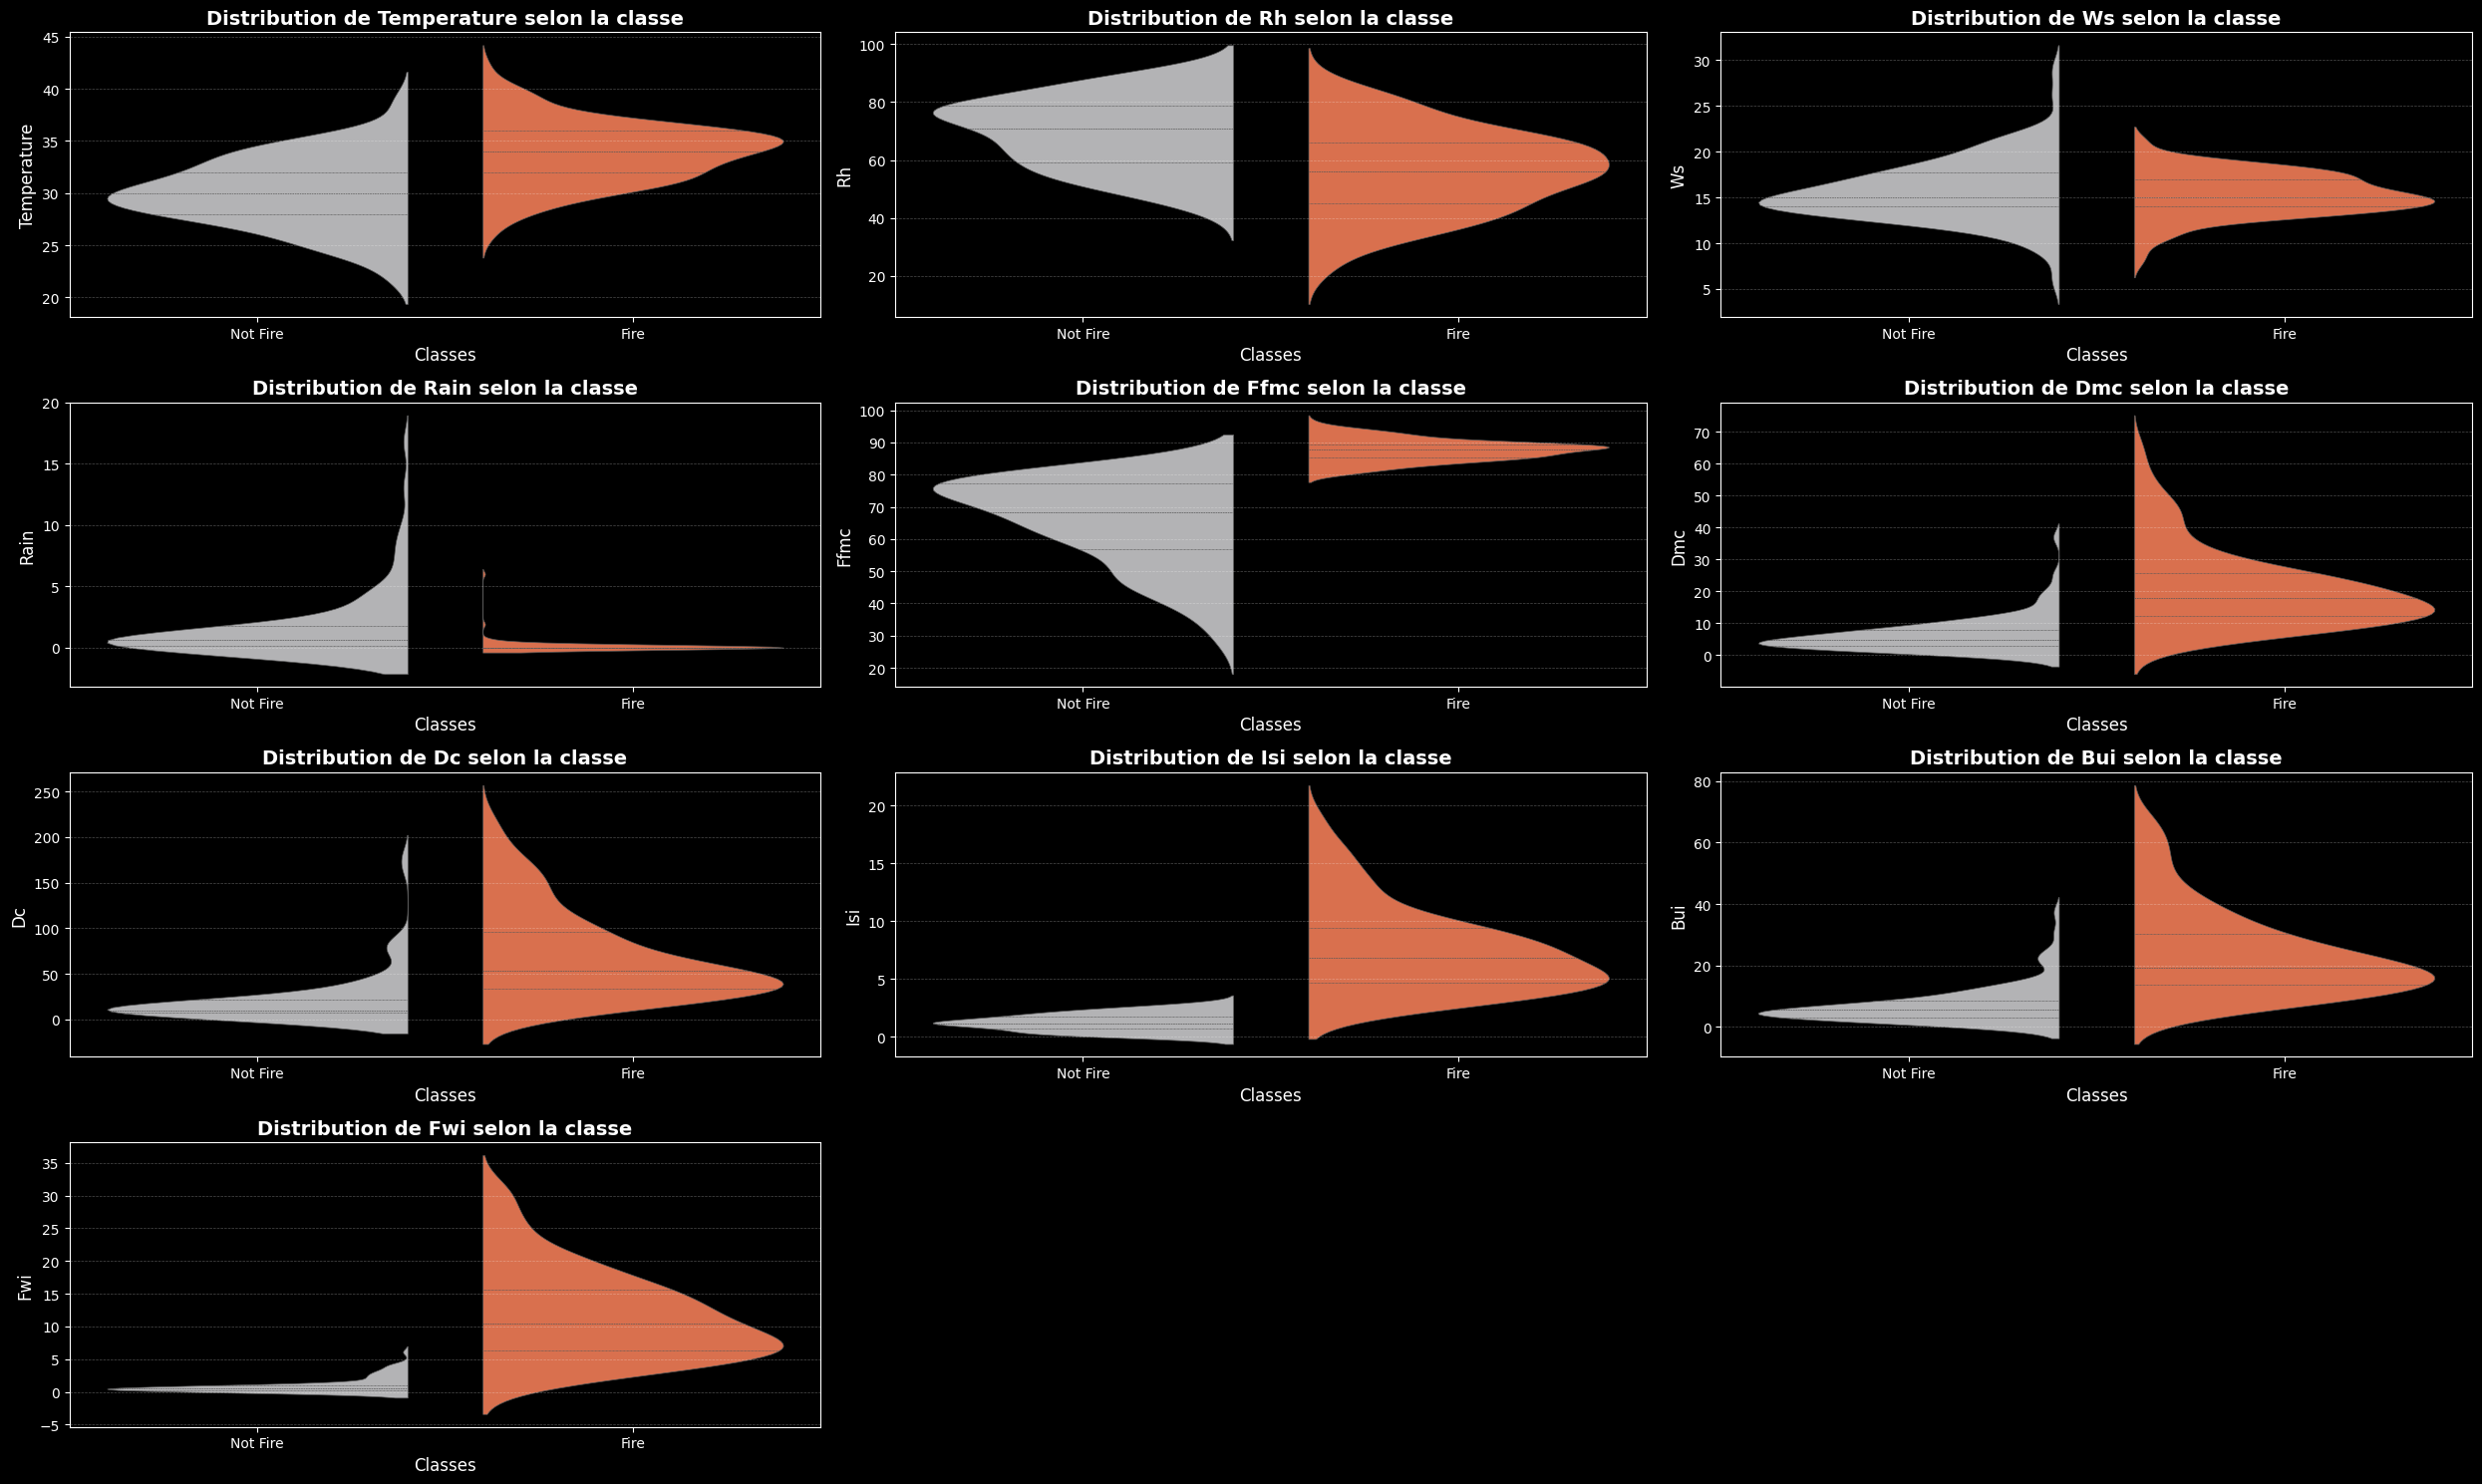

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des variables numériques
vars_num = ['Temperature', 'Rh', 'Ws', 'Rain', 'Ffmc',
            'Dmc', 'Dc', 'Isi', 'Bui', 'Fwi']

# Style
plt.style.use("dark_background")
# sns.set_style("whitegrid")

# Création de la grille
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(25, 15))
ax = ax.flatten()  # facilite la boucle

# Boucle sur les variables
for i, var in enumerate(vars_num):
    sns.violinplot(
        data=data,
        x="Classes",
        y=var,
        ax=ax[i],
        hue="Classes",
        split=True,
        inner="quart",   # quartiles visibles
        palette=palette,
        # scale="count",
        linewidth=0.5
    )

    ax[i].set_title(f"Distribution de {var} selon la classe", fontsize=14, fontweight='bold', color='white')
    ax[i].set_xlabel("Classes", fontsize=12, color='white')
    ax[i].set_ylabel(var, fontsize=12, color='white')
    ax[i].grid(axis='y', linestyle="--", linewidth=0.5, alpha=0.3)

# Supprimer les axes vides si le nombre de graphiques < nrows*ncols
for j in range(len(vars_num), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


In [253]:
# melt = pd.melt(data, id_vars="Classes", value_vars=vars_num)
# melt['value']=np.log(melt['value'])
# plt.figure(figsize=(12, 8))
# sns.boxenplot(x="variable", y="value", hue="Classes", data=melt, palette=palette)
# plt.show()

In [254]:
# plt.figure(figsize=(12, 8))
# # sns.scatterplot(data=data

# sns.violinplot(
#     data=melt,
#     # showmedians=True,
#     x="variable",
#     y="value",
#     hue="Classes",
#     split=True,
#     inner="quart",
#     # gap=0.,
#     linewidth=1.2,
#     # ls="--",
#     palette=palette
# )

# plt.show()

In [255]:
data['Month_name']=data['Month'].replace({6:"Juin",7:"Juillet",8:"Aout",9:"Septembre"})

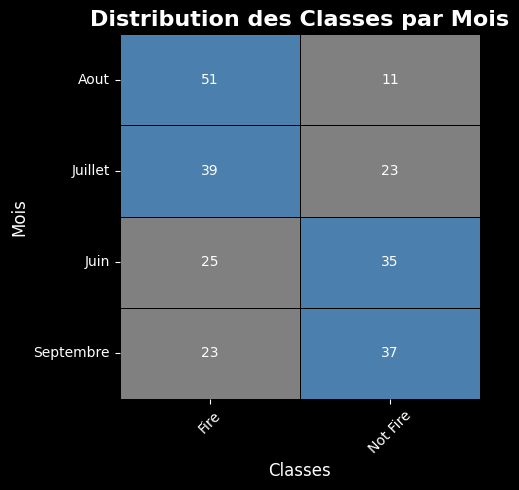

In [256]:
# Table de contingence
table = pd.crosstab(data['Month_name'], data['Classes'])

# Définir une palette personnalisée :
# Par exemple, gris pour faible, rouge pour élevé
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["gray", "#4B7FAD"])

# Afficher la heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(
    table,
    annot=True,
    fmt="d",
    cmap=custom_cmap,
    cbar=False,
    linewidths=0.5,
    linecolor="black"
)
plt.title("Distribution des Classes par Mois", fontsize=16, fontweight="bold", color="white")
plt.xlabel("Classes", fontsize=12, color="white")
plt.ylabel("Mois", fontsize=12, color="white")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


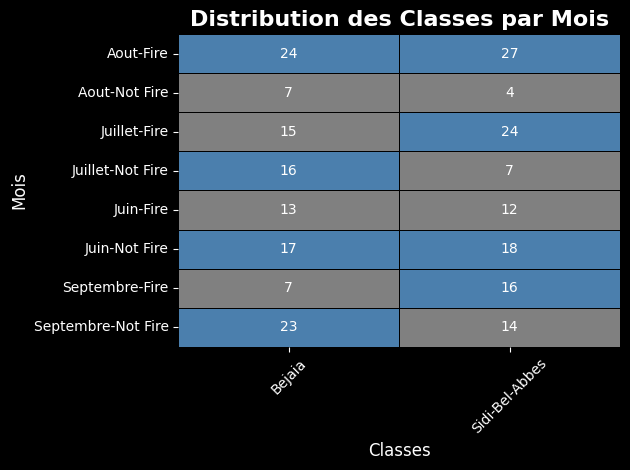

In [257]:
table = pd.crosstab(
    index=[data["Month_name"], data["Classes"]],
    columns=data["Region"]
)

sns.heatmap(
    table,
    annot=True,
    fmt="d",
    cmap=custom_cmap,
    cbar=False,
    linewidths=0.5,
    linecolor="black"
)
plt.title("Distribution des Classes par Mois", fontsize=16, fontweight="bold", color="white")
plt.xlabel("Classes", fontsize=12, color="white")
plt.ylabel("Mois", fontsize=12, color="white")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Modélisation

In [258]:
data.drop(['Day', 'Month', 'Year',"Month_name"],axis=1,inplace=True)
# data.columns

In [259]:
data['Region'] = data['Region'].map({'Bejaia': 0, 'Sidi-Bel-Abbes': 1}).astype("int")
data['Classes'] = data['Classes'].map({'Not Fire': 0, 'Fire': 1}).astype("int")
# data['Classes'].unique()

In [260]:
X = data.drop('Fwi',axis=1)
y = data['Fwi']

from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.2 , stratify= data['Classes'])
#

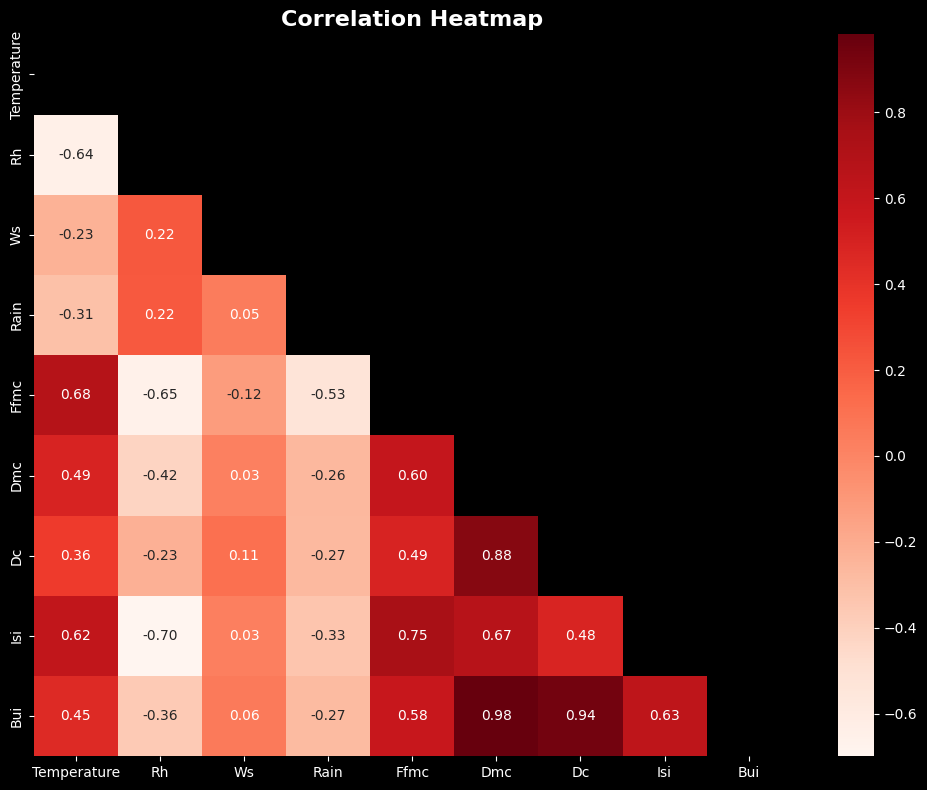

In [261]:
df_corr = X_train.loc[:,['Temperature', 'Rh', 'Ws', 'Rain', 'Ffmc', 'Dmc', 'Dc', 'Isi', 'Bui']].corr()
mask = np.triu(df_corr)

plt.figure(figsize=(10, 8))
sns.heatmap(
    df_corr,
    annot=True ,
    fmt=".2f",
    mask=mask,
    cmap="Reds")
plt.grid(False)
plt.title("Correlation Heatmap", fontsize=16, fontweight="bold", color="white")
plt.tight_layout()
plt.show()

In [262]:
# cut = ["Bui","Dc"]
# X_train = X_train.drop(cut,axis=1)
# X_test = X_test.drop(cut,axis=1)


In [279]:
from sklearn.preprocessing import StandardScaler

In [291]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from sklearn.linear_model import LinearRegression ,Lasso , LassoCV , ridge_regression , Ridge
from sklearn.model_selection import KFold, cross_validate , cross_val_score , GridSearchCV


In [274]:
# y_train=y_train.round(2)

In [281]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LinearRegression


# Si possible, repars du X_train NON scalé (X_train), pas de X_train_scaled
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(
    pipe, X_train, y_train,
    cv=cv,
    scoring=["r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"]
)

print("R2  mean:", scores["test_r2"].mean())
print("MAE mean:", -scores["test_neg_mean_absolute_error"].mean())
print("RMSE mean:", -scores["test_neg_root_mean_squared_error"].mean())


R2  mean: 0.9782125297043575
MAE mean: 0.6668524196859297
RMSE mean: 1.0537991141869711


## Lasso

In [287]:

# Si possible, repars du X_train NON scalé (X_train), pas de X_train_scaled
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Lasso())
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(
    pipe, X_train, y_train,
    cv=cv,
    scoring=["r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"]
)

print("R2  mean:", scores["test_r2"].mean())
print("MAE mean:", -scores["test_neg_mean_absolute_error"].mean())
print("RMSE mean:", -scores["test_neg_root_mean_squared_error"].mean())


R2  mean: 0.950265644780335
MAE mean: 1.1659430097935997
RMSE mean: 1.6400015526452019


In [316]:

# Si possible, repars du X_train NON scalé (X_train), pas de X_train_scaled
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge())
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(
    pipe, X_train, y_train,
    cv=cv,
    scoring=["r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"]
)

print("R2  mean:", scores["test_r2"].mean())
print("MAE mean:", -scores["test_neg_mean_absolute_error"].mean())
print("RMSE mean:", -scores["test_neg_root_mean_squared_error"].mean())




R2  mean: 0.9789062858158326
MAE mean: 0.6533646238263672
RMSE mean: 1.0249464714255692


NotFittedError: Pipeline is not fitted yet.

In [294]:
# xgbbost regression
from xgboost import XGBRegressor

# Si possible, repars du X_train NON scalé (X_train), pas de X_train_scaled
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", XGBRegressor())
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(
    pipe, X_train, y_train,
    cv=cv,
    scoring=["r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"]
)

print("R2  mean:", scores["test_r2"].mean())
print("MAE mean:", -scores["test_neg_mean_absolute_error"].mean())
print("RMSE mean:", -scores["test_neg_root_mean_squared_error"].mean())


R2  mean: 0.969842234315335
MAE mean: 0.7176140755683436
RMSE mean: 1.243598175437404


In [304]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

models = {
    "LinReg": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "RF": RandomForestRegressor(n_estimators=300, random_state=42)
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
rows = []
for name, mdl in models.items():
    # Ici, préfère la version Pipeline + StandardScaler si tu as X_train brut
    s = cross_validate(mdl, X_train_scaled, y_train, cv=cv,
                       scoring=["r2", "neg_root_mean_squared_error"])
    rows.append({
        "model": name,
        "R2_mean": s["test_r2"].mean(),
        "R2_std":  s["test_r2"].std(),
        "RMSE_mean": -s["test_neg_root_mean_squared_error"].mean()
    })
import pandas as pd
print(pd.DataFrame(rows).sort_values("R2_mean", ascending=False))


    model   R2_mean    R2_std  RMSE_mean
1   Ridge  0.978901  0.014330   1.025088
0  LinReg  0.978213  0.013412   1.053799
2   Lasso  0.977499  0.013275   1.068861
3      RF  0.974621  0.011683   1.158532


## Optimisation

In [299]:
# ── Imports
# !pip install optuna
import numpy as np
import optuna
from optuna.exceptions import TrialPruned

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_validate

# ── CV identique à ta config
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# ── Objectif Optuna : minimiser le RMSE CV
def objective(trial):
    # Espace de recherche (pragmatique et sûr pour Ridge)
    alpha = trial.suggest_float("alpha", 1e-4, 1e3, log=True)
    fit_intercept = trial.suggest_categorical("fit_intercept", [True, False])
    solver = trial.suggest_categorical(
        "solver",
        ["auto", "svd", "cholesky", "lsqr", "sag", "saga"]  # solvers stables pour Ridge
    )

    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", Ridge(alpha=alpha, fit_intercept=fit_intercept, solver=solver, random_state=42))
    ])

    # On récupère les scores par fold pour pouvoir "report" à Optuna
    scores = cross_validate(
        pipe, X_train, y_train,
        cv=cv,
        scoring={
            "r2": "r2",
            "mae": "neg_mean_absolute_error",
            "rmse": "neg_root_mean_squared_error"
        },
        n_jobs=-1,
        return_train_score=False
    )

    # Moyennes (on remet les signes)
    r2_mean   =  scores["test_r2"].mean()
    mae_mean  = -scores["test_mae"].mean()
    rmse_mean = -scores["test_rmse"].mean()

    # Objectif principal : RMSE
    trial.set_user_attr("r2_mean", r2_mean)
    trial.set_user_attr("mae_mean", mae_mean)

    return rmse_mean

# ── Lancement de l’étude
study = optuna.create_study(direction="minimize", study_name="ridge_rmse_cv")
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("Best RMSE:", study.best_value)
print("Best params:", study.best_params)
print("CV (r2, mae) at best:", study.best_trial.user_attrs["r2_mean"], study.best_trial.user_attrs["mae_mean"])

# ── Refit du meilleur pipeline sur tout X_train
best_params = study.best_params
best_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(
        alpha=best_params["alpha"],
        fit_intercept=best_params["fit_intercept"],
        solver=best_params["solver"],
        random_state=42
    ))
])
best_pipe.fit(X_train, y_train)

# ── (Optionnel) Évalue proprement en CV multi-métriques pour reporting
scores = cross_validate(
    best_pipe, X_train, y_train,
    cv=cv,
    scoring=["r2", "neg_mean_absolute_error", "neg_root_mean_squared_error"],
    n_jobs=-1
)
print("R2  mean:",  scores["test_r2"].mean())
print("MAE mean:", -scores["test_neg_mean_absolute_error"].mean())
print("RMSE mean:", -scores["test_neg_root_mean_squared_error"].mean())


# Best params: {'alpha': 0.3232517333047961, 'fit_intercept': True, 'solver': 'sag'}
# CV (r2, mae) at best: 0.9790787434566944 0.647816708890309
# R2  mean: 0.9790787434566944
# MAE mean: 0.647816708890309
# RMSE mean: 1.019103122317758

R2  mean: 0.9790787434566944
MAE mean: 0.647816708890309
RMSE mean: 1.019103122317758


## Evaluations

In [318]:
y_pred = best_pipe.predict(X_test)

r2   = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)

print(f"Test — R²: {r2:.3f} | RMSE: {rmse:.3f} | MAE: {mae:.3f}")

Test — R²: 0.912 | RMSE: 2.089 | MAE: 0.728


In [325]:
Ridge_rgs = Ridge()
Ridge_rgs.fit(X_train_scaled, y_train)
y_pred = Ridge_rgs.predict(X_test_scaled)

r2   = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)

print(f"Test — R²: {r2:.3f} | RMSE: {rmse:.3f} | MAE: {mae:.3f}")


Test — R²: 0.913 | RMSE: 2.071 | MAE: 0.732


In [329]:
import pickle
pickle.dump(best_pipe, open("model.pkl", "wb"))
# pickle.dump()


{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', Ridge(alpha=0.3232517333047961, random_state=42, solver='sag'))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'model': Ridge(alpha=0.3232517333047961, random_state=42, solver='sag'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__alpha': 0.3232517333047961,
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__max_iter': None,
 'model__positive': False,
 'model__random_state': 42,
 'model__solver': 'sag',
 'model__tol': 0.0001}